In [2]:
import pandas as pd
import ast
import requests
import json
import pandas as pd
import io
import math
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import gensim
from gensim import corpora
from bertopic import BERTopic
from umap import UMAP
from hdbscan import HDBSCAN
from bertopic.representation import MaximalMarginalRelevance
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import numpy as np
from collections import Counter
import ast
import requests
import json
import pandas as pd
import io
import math
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import gensim
from gensim import corpora
from bertopic import BERTopic
from umap import UMAP
from hdbscan import HDBSCAN
from bertopic.representation import MaximalMarginalRelevance
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

In [ ]:
content_df = pd.read_csv('C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/papers_content_v4.csv', encoding='utf-8')
docs = content_df['chunks'].tolist()
docs

First, for BERTopic

In [8]:


file_paths = [
    'C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/papers_BERTopic_v5.csv',
    'C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/papers_BERTopic_v6_bt_keybert_top-w-15_min-ts50.csv',
    'C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/papers_BERTopic_v7_bt_keybert_top-w-20_min-ts50.csv',
    'C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/papers_BERTopic_v8_bt_mmr_top-w-15_min-ts50.csv',
    'C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/papers_BERTopic_v9_bt_mmr_top-w-15_min-ts100.csv',
    'C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/papers_BERTopic_v10_bt_zs_top-w-15_min-ts50.csv',
    'C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/papers_BERTopic_v11_multi.csv',
    'C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/papers_BERTopic_v12_multi2.csv',
    'C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/papers_BERTopic_v13_multi2.csv'
]


# Function to parse and count topics
def parse_and_count_topics(topic_string):
    # Check if the topic_string is NaN
    if pd.isna(topic_string):
        return np.nan
    # Convert the string representation of a list to an actual list using ast.literal_eval
    topic_list = ast.literal_eval(topic_string)
    # Create a Counter dictionary from the list to count the occurrence of each topic
    topic_counter = Counter(f"B{topic}" for topic in topic_list)
    return dict(topic_counter)


# Function to calculate percentage of topics
def calculate_percentage(counter_dict):
    if pd.isna(counter_dict):
        return np.nan
    total = sum(counter_dict.values())
    percentages = {key: (value / total) * 100 for key, value in counter_dict.items()}
    return percentages

# Function to count rows with 'B1' having more than the threshold percentage
def count_above_threshold(df, threshold):
    return df['Parsed_BERTopics_percentage'].apply(
        lambda x: x.get('B1', 0) >= threshold if isinstance(x, dict) else False).sum()



In [ ]:
# Reading and processing each file
dfs = []
for file_path in file_paths:
    df = pd.read_csv(file_path, encoding='utf-8', sep='\t')
    df = df[['fileMain_s', 'chunks', 'numChunks', 'Chunks_BERTopics']]
    df['Parsed_BERTopics'] = df['Chunks_BERTopics'].apply(parse_and_count_topics)
    df['Parsed_BERTopics_percentage'] = df['Parsed_BERTopics'].apply(calculate_percentage)
    dfs.append(df)



In [62]:
# Assigning each processed DataFrame to a variable
(papers_bt5, papers_bt6, papers_bt7, papers_bt8, papers_bt9, papers_bt10, papers_bt11, papers_bt12, papers_bt13) = dfs

# Define thresholds
thresholds = [40, 50, 60, 70, 80, 90, 100]

# Create the outliers_count DataFrame
outliers_count = pd.DataFrame({
    'threshold': thresholds,
    'bt5': [count_above_threshold(papers_bt5, t) for t in thresholds],
    'bt6': [count_above_threshold(papers_bt6, t) for t in thresholds],
    'bt7': [count_above_threshold(papers_bt7, t) for t in thresholds],
    'bt8': [count_above_threshold(papers_bt8, t) for t in thresholds],
    'bt9': [count_above_threshold(papers_bt9, t) for t in thresholds],
    'bt10': [count_above_threshold(papers_bt10, t) for t in thresholds],
    'bt11': [count_above_threshold(papers_bt11, t) for t in thresholds],
    'bt12': [count_above_threshold(papers_bt12, t) for t in thresholds],
    'bt13': [count_above_threshold(papers_bt13, t) for t in thresholds]
})

# Set 'threshold' as the index
outliers_count.set_index('threshold', inplace=True)
outliers_count

,bt5,bt6,bt7,bt8,bt9,bt10,bt11,bt12,bt13
threshold,,,,,,,,,
40,21,33,50,22,72,29,56,32,32
50,20,24,45,19,68,22,49,27,27
60,19,18,33,17,61,17,42,22,22
70,14,11,27,15,52,11,34,15,15
80,11,7,19,13,38,6,26,12,12
90,5,3,7,4,15,2,5,3,3
100,3,0,3,2,2,1,1,2,2


<Figure size 1600x1200 with 0 Axes>

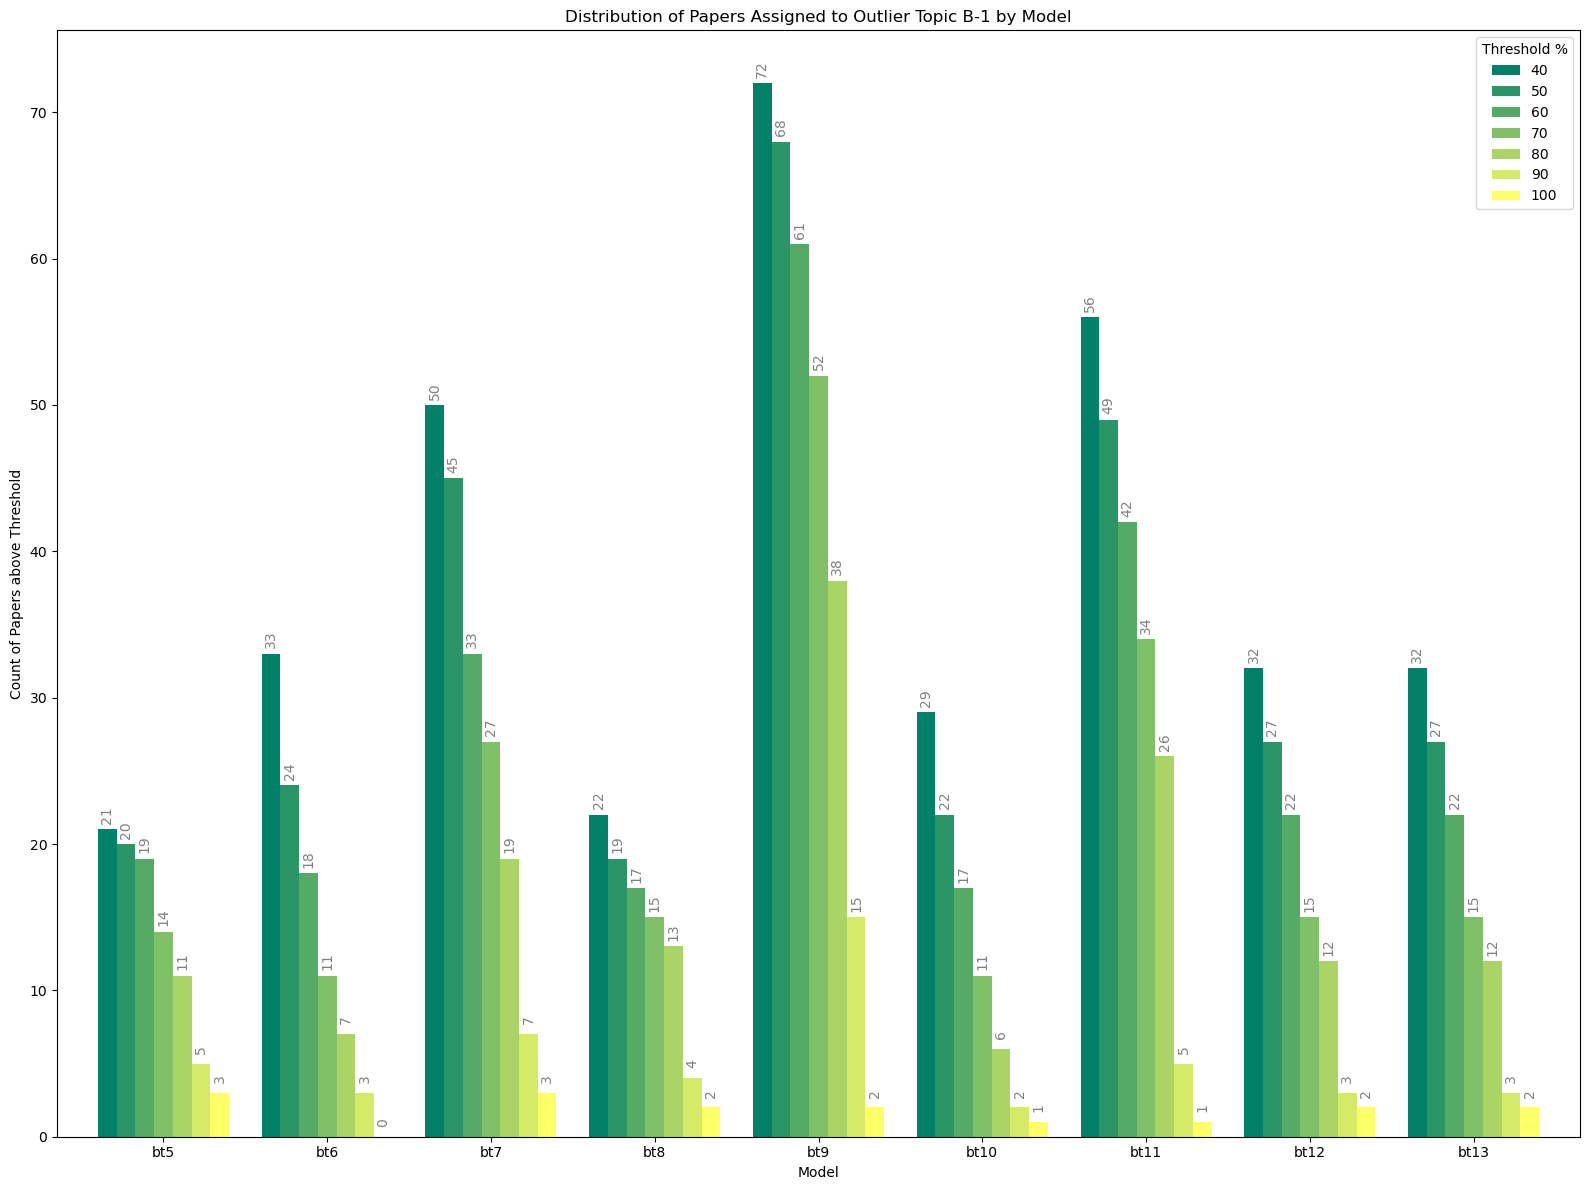

In [67]:
import matplotlib.pyplot as plt

# Transpose the outliers_count DataFrame to group by model
outliers_count_transposed = outliers_count.transpose()

# Define the colormap
cmap = plt.get_cmap('summer')
colors = cmap(np.linspace(0, 1, len(outliers_count_transposed.columns)))

# Plot the distribution
plt.figure(figsize=(16, 12))
ax = outliers_count_transposed.plot(kind='bar', figsize=(16, 12), width=0.8, color=colors)
plt.title('Distribution of Papers Assigned to Outlier Topic B-1 by Model')
plt.xlabel('Model')
plt.ylabel('Count of Papers above Threshold')
plt.xticks(rotation=0)
plt.legend(title='Threshold %', loc='upper right')
ax.grid(False)  # Remove grid lines

# Add values above each bar
for p in ax.patches:
    height = p.get_height()
    if height >= 0:
        ax.annotate(str(int(height)), (p.get_x() + p.get_width() / 2., height +0.5),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points', rotation=90, color='grey')

plt.tight_layout()
# Save the plot
output_path = 'C:/Users/maria/OneDrive/Documentos/Thesis/Report/bertopic_comparissons_outlier_topic.png'
plt.savefig(output_path)
# Show the plot
plt.show()


Now, for LDA

In [20]:
lda_path = 'C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/papers_v3_basics.csv'
lda_df = pd.read_csv(lda_path, encoding='utf-8')
lda_df['Parsed_TopicsLDA'] = lda_df['Parsed_TopicsLDA'].apply(ast.literal_eval)
lda_df

,fileMain_s,numChunks,Chunks_BERTopics,Topic_Counter,Topic_Percentage,TaxoEntitiesMD2_GBIF,TaxoEntities_Count,Species_Count,kingdom_tuple_Count,phylum_tuple_Count,...,order_tuple_Count,family_tuple_Count,genus_tuple_Count,species_tuple_Count,Parsed_TopicsLDA,releasedDateY_i,Gender_Numeric_Avg,First_Gender_Value,Last_Gender_Value,Gender_Counts
0,https://cnrs.hal.science/hal-03755748/document,1,[61],{'B61': 1},{'B61': 100.0},[],Counter(),[],[],[],...,[],[],[],[],"{'L4': 25, 'L10': 19, 'L12': 8, 'L21': 22, 'L3...",2022,-0.555556,1.0,-1.0,"{'female': 2, 'male': 2, 'unknown': 2}"
1,https://hal.science/hal-01296551/document,1,[-1],{'B-1': 1},{'B-1': 100.0},[],Counter(),[],[],[],...,[],[],[],[],"{'L29': 4, 'L30': 5, 'L32': 7, 'L47': 67, 'L57...",2016,-0.333333,1.0,-1.0,"{'male': 6, 'female': 4, 'unknown': 1, 'mostly..."
2,https://hal.science/hal-00870744/document,1,[-1],{'B-1': 1},{'B-1': 100.0},[],Counter(),[],[],[],...,[],[],[],[],"{'L19': 6, 'L30': 7, 'L47': 85}",2013,-1.000000,-1.0,-1.0,"{'female': 1, 'male': 1}"
3,https://hal.science/hal-00949680/document,1,[5],{'B5': 1},{'B5': 100.0},[],Counter(),[],[],[],...,[],[],[],[],"{'L21': 5, 'L38': 16, 'L46': 13, 'L50': 64}",2014,0.000000,-1.0,0.0,{'female': 2}
4,https://hal.inrae.fr/hal-02699278/document,1,[-1],{'B-1': 1},{'B-1': 100.0},"[[('GBIF:3042', 'aphid', 1.0), ('GBIF:4386623'...","Counter({('GBIF:3042', 'aphid'): 2, ('GBIF:438...","[Counter({('GBIF:2069580', 'Rhopalosiphum padi...","[(('GBIF:1', 'Animalia'), 4)]","[(('GBIF:54', 'Arthropoda'), 4)]",...,"[(('GBIF:809', 'Hemiptera'), 4)]","[(('GBIF:3042', 'Aphididae'), 4)]","[(('GBIF:2069512', 'Rhopalosiphum'), 4)]","[(('GBIF:2069580', 'Rhopalosiphum padi'), 4)]","{'L9': 11, 'L19': 8, 'L38': 6, 'L39': 32, 'L56...",2020,-0.833333,-0.5,-1.0,"{'male': 7, 'female': 7}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,https://hal.science/hal-03362851/document,47,"[60, 2, 2, 2, 2, -1, 2, 2, -1, 1, 1, -1, -1, -...","{'B60': 1, 'B2': 26, 'B-1': 10, 'B1': 4, 'B22'...","{'B60': 2.127659574468085, 'B2': 55.3191489361...","[[('GBIF:1673043', 'Synthesia', 0.906332910060...","Counter({('GBIF:2878688', 'Quercus robur'): 2,...","[Counter({('GBIF:2878688', 'Quercus robur'): 2...","[(('GBIF:6', 'Plantae'), 331)]","[(('GBIF:7707728', 'Tracheophyta'), 331)]",...,"[(('GBIF:1354', 'Fagales'), 82), (('GBIF:691',...","[(('GBIF:5015', 'Rosaceae'), 61), (('GBIF:4689...","[(('GBIF:2877951', 'Quercus'), 27), (('GBIF:28...","[(('GBIF:2882316', 'Fagus sylvatica'), 18), ((...","{'L8': 4, 'L17': 8, 'L21': 72, 'L38': 2, 'L48'...",2021,-0.442308,1.0,-1.0,"{'female': 4, 'mostly_female': 1, 'male': 2, '..."
1004,https://hal.science/hal-03004624/document,54,"[5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1...","{'B5': 1, 'B-1': 45, 'B4': 5, 'B1': 1, 'B40': ...","{'B5': 1.8518518518518516, 'B-1': 83.333333333...","[[('GBIF:2440735', 'Balaenoptera musculus', 1....","Counter({('GBIF:5888', 'white sharks'): 2, ('G...","[Counter({('GBIF:2440735', 'Balaenoptera muscu...","[(('GBIF:1', 'Animalia'), 70), (('GBIF:6', 'Pl...","[(('GBIF:44', 'Chordata'), 69), (('GBIF:54', '...",...,"[(('GBIF:732', 'Carnivora'), 18), (('GBIF:731'...","[(('GBIF:9701', 'Canidae'), 18), (('GBIF:5240'...","[(('GBIF:5219142', 'Canis'), 18), (('GBIF:2481...","[(('GBIF:5219173', 'Canis lupus'), 18), (('GBI...","{'L12': 4, 'L14': 8, 'L16': 1, 'L18': 2, 'L29'...",2020,-0.642857,-1.0,-0.5,"{'female': 3, 'male': 5}"
1005,https://hal.inrae.fr/hal-04429206/document,57,"[60, 2, 60, 2, 2, 2, 2, 2, 2, -1, -1, 1, -1, 2...","{'B60': 2, 'B2': 17, 'B-1': 36, 'B1': 1, 'B14'...","{'B60': 3.508771929824561, 'B2': 29.8245614035...","[[('GBIF:4597213', 'Wolfgangia', 0.70422244071...","Counter({('GBIF:2382506', 'Gorete'): 3, ('GBIF...","[Counter({('GBIF:2482552', 'Chough'): 1}), Cou...","[(('GBIF:1', 'Animalia'), 9), (('GBIF:6', 'Pla...","[(('GBIF:44', 'Chordata'), 9), (('GBIF:7707728...",...,"[(('GBIF:587', 'Perciformes'), 3), (('GBIF:729...","[(('GBIF:4276', 'Haemulidae'), 3), 

In [23]:
type(lda_df['Parsed_TopicsLDA'].iloc[0] )

dict

In [28]:
def sum_counters(counter_dict):
    total_sum = sum(counter_dict.values())
    return total_sum

lda_df['Sum_LDA_Percentages'] = lda_df['Parsed_TopicsLDA'].apply(sum_counters)
lda_df['num_LDA_Topics'] = lda_df['Parsed_TopicsLDA'].apply(len)

# Display the resulting DataFrame
lda_df = lda_df.sort_values(by='Sum_LDA_Percentages')
lda_df.head(40)

,fileMain_s,numChunks,Chunks_BERTopics,Topic_Counter,Topic_Percentage,TaxoEntitiesMD2_GBIF,TaxoEntities_Count,Species_Count,kingdom_tuple_Count,phylum_tuple_Count,...,genus_tuple_Count,species_tuple_Count,Parsed_TopicsLDA,releasedDateY_i,Gender_Numeric_Avg,First_Gender_Value,Last_Gender_Value,Gender_Counts,Sum_LDA_Percentages,num_LDA_Topics
891,https://hal.inrae.fr/hal-02619228/document,25,"[14, -1, -1, -1, -1, -1, -1, -1, -1, -1, 55, -...","{'B14': 1, 'B-1': 22, 'B55': 1, 'B21': 1}","{'B14': 4.0, 'B-1': 88.0, 'B55': 4.0, 'B21': 4.0}","[[('GBIF:2436436', 'Homo sapiens', 1.0)], [('G...","Counter({('GBIF:2436436', 'Homo sapiens'): 118...","[Counter({('GBIF:2436436', 'Homo sapiens'): 11...","[(('GBIF:1', 'Animalia'), 503), (('GBIF:6', 'P...","[(('GBIF:44', 'Chordata'), 502), (('GBIF:54', ...",...,"[(('GBIF:2436435', 'Homo'), 361), (('GBIF:2441...","[(('GBIF:2436436', 'Homo sapiens'), 357), (('G...","{'L0': 3, 'L1': 3, 'L4': 1, 'L9': 23, 'L16': 3...",2020,-0.250000,0.5,-1.0,"{'male': 55, 'mostly_male': 1, 'female': 11, '...",87,17
1004,https://hal.science/hal-03004624/document,54,"[5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1...","{'B5': 1, 'B-1': 45, 'B4': 5, 'B1': 1, 'B40': ...","{'B5': 1.8518518518518516, 'B-1': 83.333333333...","[[('GBIF:2440735', 'Balaenoptera musculus', 1....","Counter({('GBIF:5888', 'white sharks'): 2, ('G...","[Counter({('GBIF:2440735', 'Balaenoptera muscu...","[(('GBIF:1', 'Animalia'), 70), (('GBIF:6', 'Pl...","[(('GBIF:44', 'Chordata'), 69), (('GBIF:54', '...",...,"[(('GBIF:5219142', 'Canis'), 18), (('GBIF:2481...","[(('GBIF:5219173', 'Canis lupus'), 18), (('GBI...","{'L12': 4, 'L14': 8, 'L16': 1, 'L18': 2, 'L29'...",2020,-0.642857,-1.0,-0.5,"{'female': 3, 'male': 5}",91,10
942,https://hal.science/hal-03824235/document,28,"[5, 14, 12, 12, 12, 12, 12, 12, 12, 2, 12, 12,...","{'B5': 1, 'B14': 1, 'B12': 21, 'B2': 2, 'B30':...","{'B5': 3.571428571428571, 'B14': 3.57142857142...","[[('GBIF:4988', 'copepods', 1.0), ('GBIF:80670...","Counter({('GBIF:2073', 'krill'): 4, ('GBIF:868...","[Counter({('GBIF:2400265', 'Freshwater drum'):...","[(('GBIF:6', 'Plantae'), 14), (('GBIF:1', 'Ani...","[(('GBIF:7707728', 'Tracheophyta'), 14), (('GB...",...,"[(('GBIF:3000739', 'Dryas'), 4), (('GBIF:29845...","[(('GBIF:5361880', 'Cannabis sativa'), 4), (('...","{'L12': 77, 'L24': 2, 'L29': 1, 'L31': 1, 'L44...",2022,-0.500000,-1.0,-1.0,"{'female': 2, 'male': 4}",91,8
969,https://hal.inrae.fr/hal-04509149/document,31,"[14, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0...","{'B14': 2, 'B-1': 17, 'B0': 12}","{'B14': 6.451612903225806, 'B-1': 54.838709677...","[[('GBIF:1654104', 'Onirion', 0.77754968404769...","Counter({('GBIF:2439140', 'Clethrionomys glare...","[Counter({('GBIF:5706764', 'Myodes glareolus')...","[(('GBIF:1', 'Animalia'), 101), (('GBIF:6', 'P...","[(('GBIF:44', 'Chordata'), 98), (('GBIF:770772...",...,"[(('GBIF:2438724', 'Myodes'), 30), (('GBIF:243...","[(('GBIF:5706764', 'Myodes glareolus'), 30), (...","{'L0': 5, 'L17': 1, 'L21': 1, 'L23': 38, 'L37'...",2024,-0.250000,-1.0,1.0,"{'male': 2, 'unknown': 2, 'female': 1}",92,10
987,https://hal.science/hal-01624074/document,35,"[14, -1, -1, 19, 28, 24, -1, -1, -1, -1, -1, -...","{'B14': 1, 'B-1': 23, 'B19': 1, 'B28': 9, 'B24...","{'B14': 2.857142857142857, 'B-1': 65.714285714...","[[('GBIF:35', 'Bryophyta', 0.7998815178871155)...","Counter({('GBIF:7689', 'orchids'): 8, ('GBIF:2...","[Counter({('GBIF:2930137', 'tomato'): 1}), Cou...","[(('GBIF:6', 'Plantae'), 48), (('GBIF:1', 'Ani...","[(('GBIF:7707728', 'Tracheophyta'), 46), ((Non...",...,"[(('GBIF:2705180', 'Sorghum'), 12), (('GBIF:29...","[(('GBIF:2930137', 'Solanum lycopersicum'), 10...","{'L6': 4, 'L37': 2, 'L38': 75, 'L39': 2, 'L40'...",2023,-0.333333,-1.0,-1.0,"{'female': 3, 'male': 2}",93,9
979,https://hal.univ-reunion.fr/hal-03009608/document,33,"[61, 14, -1, -1, -1, -1, -1, -1, 0, 0, -1, -1,...","{'B61': 1, 'B14': 1, 'B-1': 21, 'B0': 9, 'B11'...","{'B61': 3.0303030303030303, 'B14': 3.030303030...","[[('GBIF:2182873

### Evaluating Specificity

In [1]:
topics_file_paths = [
    'C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/topics_BERTopic_keybert_v1_535.csv',
#    'C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/topics_BERTopic_v6_keybert_top15_mints50.csv',
#    'C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/topics_BERTopic_v7_keybert_top20_mints50.csv',
    'C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/topics_BERTopic_v8_mmr_top15_mints50.csv',
    'C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/topics_BERTopic_v9_mmr_top15_mints50.csv',
    'C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/topics_BERTopic_v10_zs_top15_mints50.csv',
    'C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/topics_BERTopic_v11_multi1.csv',
    'C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/topics_BERTopic_v12_multi2.csv',
    'C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/topics_BERTopic_v13_multi2.5.csv'
]

In [7]:
topics_df = pd.read_excel('C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/topics_BERTopic_v6_keybert_top15_mints50_3.xlsx')
#topics_df[['Topic', 'Words']] = topics_df.iloc[:, 0].str.split('\t', expand=True)
topics_df

ImportError: Pandas requires version '3.1.0' or newer of 'openpyxl' (version '3.0.10' currently installed).

In [18]:
import numpy as np
from collections import defaultdict
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

# Function to calculate IDF for each word
def calculate_idf(corpus):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(corpus)
    df = np.sum(X > 0, axis=0)
    idf = np.log((1 + len(corpus)) / (1 + df)) + 1
    idf = np.array(idf).flatten()
    return dict(zip(vectorizer.get_feature_names_out(), idf))

# Calculate IDF for all words in the vocabulary
idf = calculate_idf(docs)
idf

{'___': 6.666426688112432,
 '____': 7.359573868672378,
 '_____': 7.359573868672378,
 '______': 7.359573868672378,
 '________________________________________________________________________': 7.359573868672378,
 '__bmmluőƒəəѵķƒəəƕőķƒəə_ѵomķubm': 7.359573868672378,
 '__bmķ': 7.359573868672378,
 '__bmķĺķşluķĺőƒəəƕőĺ': 7.359573868672378,
 '__bmķĺķşluķĺőƒəəѵőĺmymom_uoro': 7.359573868672378,
 '__ouvo_ruofķvu_v': 7.359573868672378,
 '__ubmuvbm': 7.359573868672378,
 '__umouuѵঞomrmvomѵmvĺ': 7.359573868672378,
 '__uķ': 7.359573868672378,
 '__vouvmuѵঞѵѵbѵѵmŋv_m': 7.359573868672378,
 '_aa': 7.359573868672378,
 '_b_': 7.359573868672378,
 '_b__uubvঞvobv': 7.359573868672378,
 '_b__vrbv_': 7.359573868672378,
 '_b_mպպomfubŋofmbպպĺumbuպպ': 7.359573868672378,
 '_b_ouvķķmuomvuঞom': 7.359573868672378,
 '_b_ovķm': 7.359573868672378,
 '_b_ovķĺ': 7.359573868672378,
 '_b_oѵo': 7.359573868672378,
 '_b_ѵmvvmo_u': 7.359573868672378,
 '_bbvumomѵoѵroѵѵbmoubuvbmvrbvumou': 7.359573868672378,
 '_bbvuruvmbuѵmѵbmĺbuѵ': 

In [10]:
# Function to clean and convert probabilities
def clean_probabilities(prob_str):
    prob_str = prob_str.strip("[]")
    prob_str = prob_str.replace("(", "").replace(")", "")
    prob_list = prob_str.split(", ")
    probs = []
    for prob in prob_list:
        try:
            probs.append(float(prob))
        except ValueError as e:
            print(f"Error converting '{prob}' to float: {e}")
    return probs

# Function to calculate specificity score for a topic
def calculate_specificity(words, probs, idf):
    specificity = sum(prob * idf.get(word, 0) for word, prob in zip(words, probs))
    return specificity

'''# Calculate specificity for each topic
specificity_scores = {}
for index, row in topics_df.iterrows():
    topic = row['Topic']
    words = row['Words'].strip("[]").replace("'", "").split(", ")
    probs = clean_probabilities(row['Probabilities'])
    specificity_scores[topic] = calculate_specificity(words, probs, idf)

# Print specificity scores for each topic
for topic, score in specificity_scores.items():
    print(f"{topic} Specificity Score: {score:.4f}")'''

'# Calculate specificity for each topic\nspecificity_scores = {}\nfor index, row in topics_df.iterrows():\n    topic = row[\'Topic\']\n    words = row[\'Words\'].strip("[]").replace("\'", "").split(", ")\n    probs = clean_probabilities(row[\'Probabilities\'])\n    specificity_scores[topic] = calculate_specificity(words, probs, idf)\n\n# Print specificity scores for each topic\nfor topic, score in specificity_scores.items():\n    print(f"{topic} Specificity Score: {score:.4f}")'

In [11]:
# Dictionary to store specificity scores for each file
all_specificity_scores = {}

for file_path in topics_file_paths:
    topics_df = pd.read_csv(file_path, encoding='utf-8',sep='\t')
    specificity_scores = {}
    
    for index, row in topics_df.iterrows():
        topic = row['Topic']
        words = row['Words'].strip("[]").replace("'", "").split(", ")
        probs = clean_probabilities(row['Probabilities'])
        specificity_scores[topic] = calculate_specificity(words, probs, idf)
    
    all_specificity_scores[file_path] = specificity_scores

# Aggregate and plot the results
average_specificity_scores = {
    file_path: np.mean(list(scores.values()))
    for file_path, scores in all_specificity_scores.items()
}



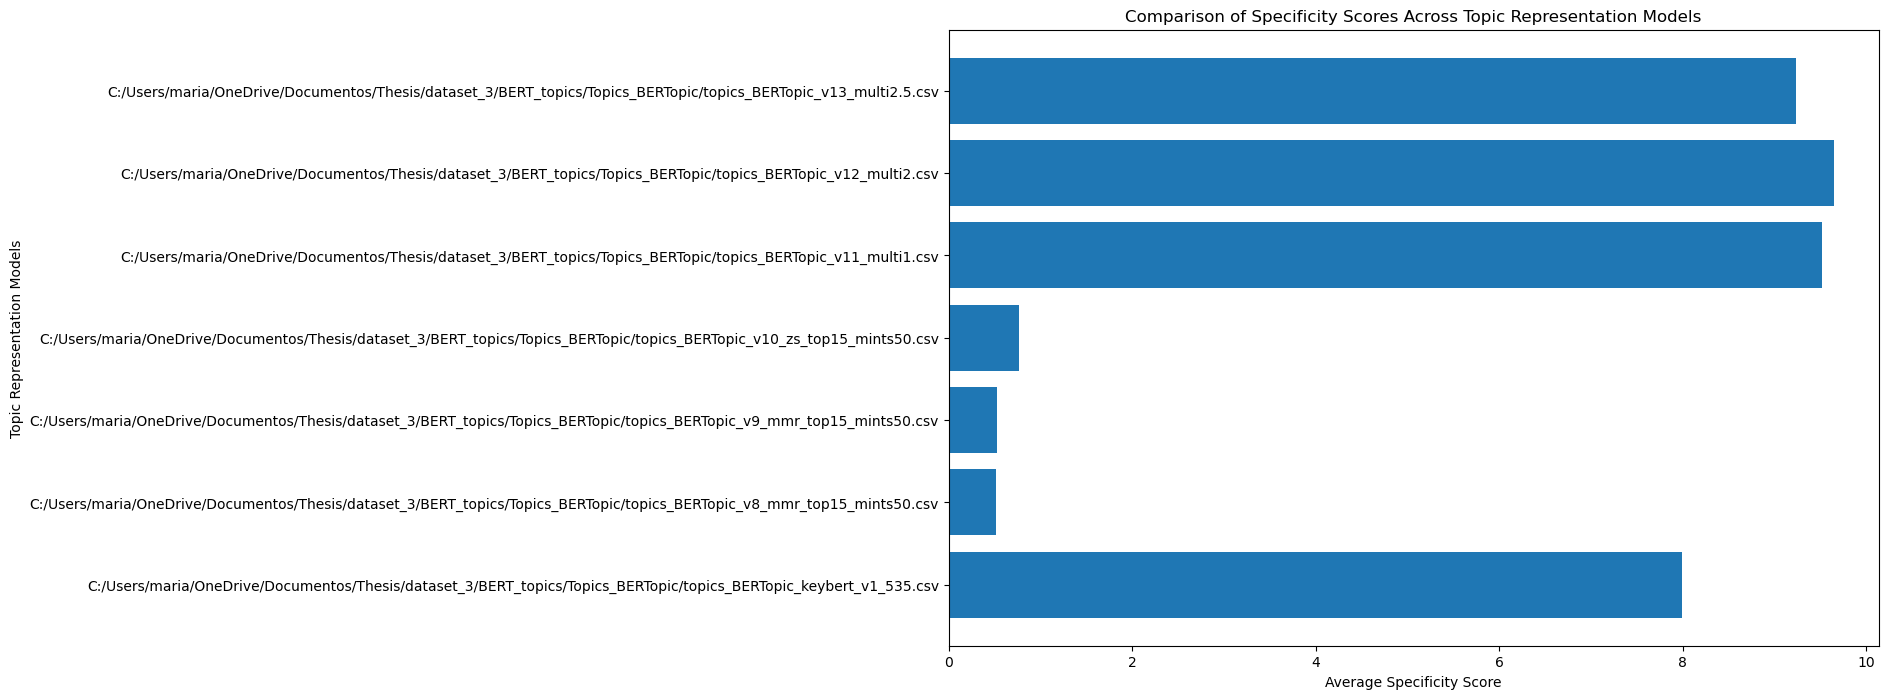

In [12]:
# Plotting the average specificity scores
plt.figure(figsize=(12, 8))
plt.barh(list(average_specificity_scores.keys()), list(average_specificity_scores.values()))
plt.xlabel('Average Specificity Score')
plt.ylabel('Topic Representation Models')
plt.title('Comparison of Specificity Scores Across Topic Representation Models')
plt.show()

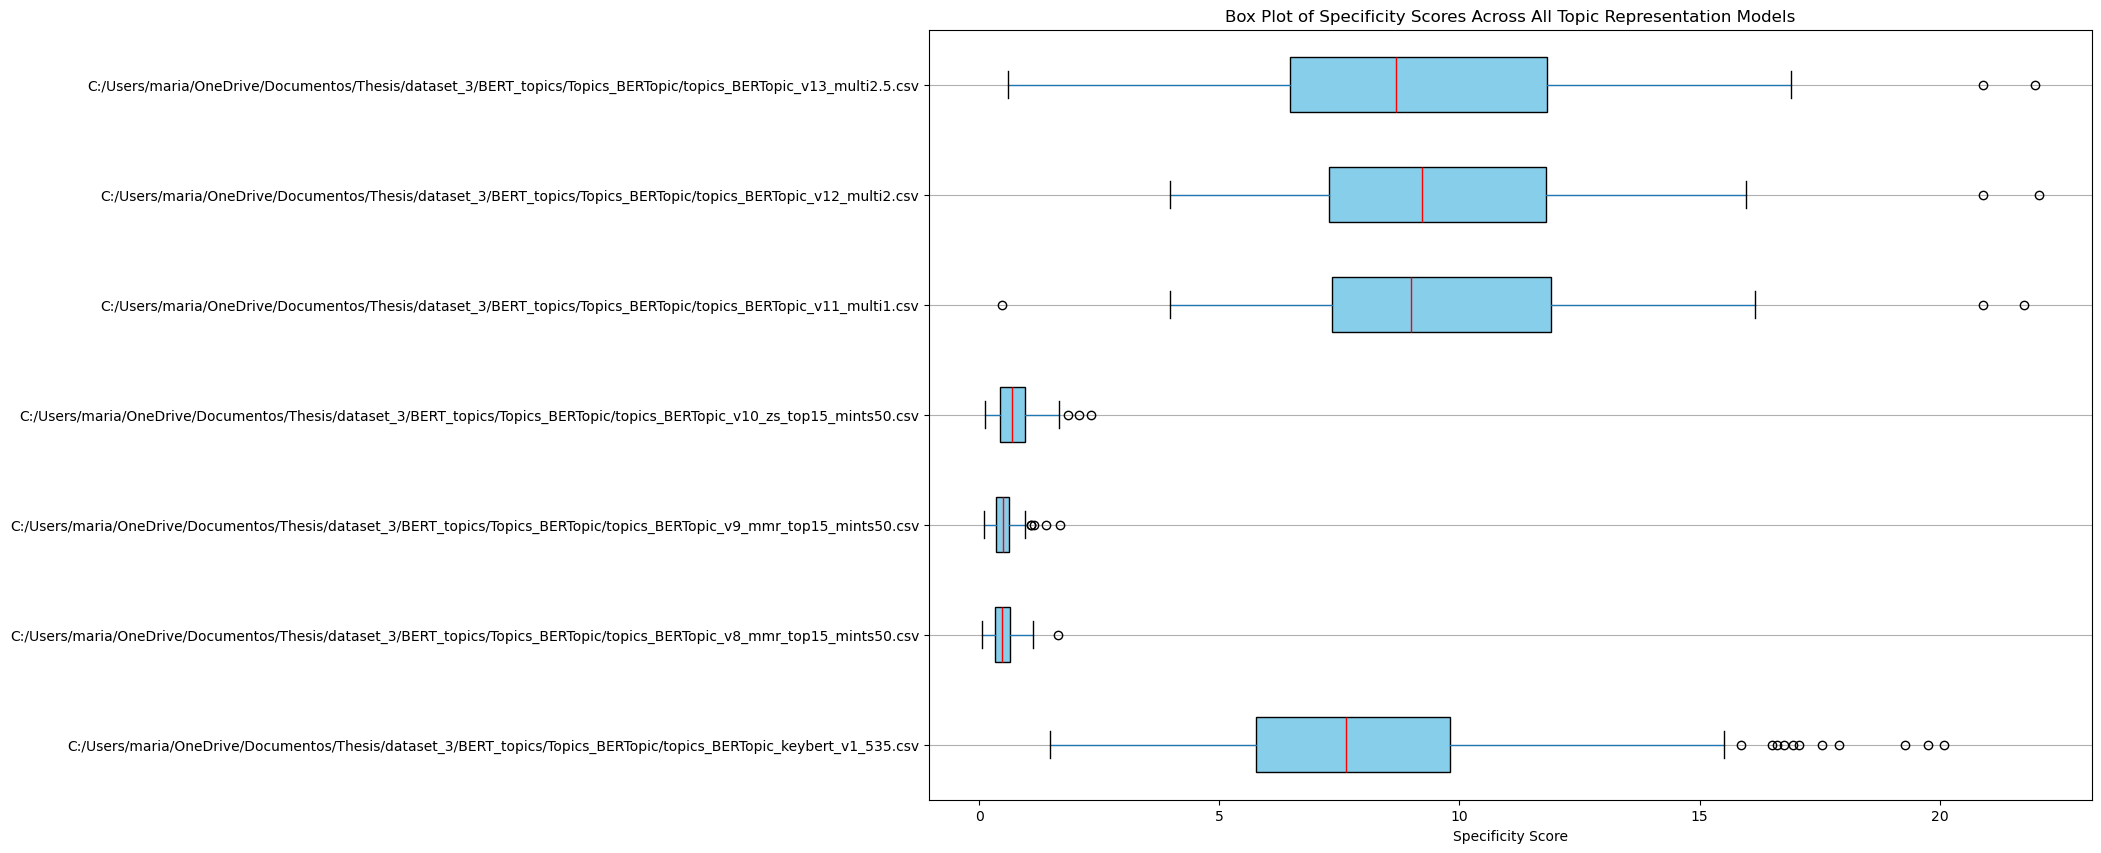

In [16]:
all_specificity_scores_df = pd.DataFrame.from_dict(all_specificity_scores, orient='index').transpose()


# Create a box plot for all specificity scores
plt.figure(figsize=(15, 10))
all_specificity_scores_df.boxplot(vert=False, patch_artist=True, 
                                  boxprops=dict(facecolor='skyblue'), medianprops=dict(color='red'))

plt.xlabel('Specificity Score')
plt.title('Box Plot of Specificity Scores Across All Topic Representation Models')
plt.grid(axis='x')
plt.yticks(range(1, len(all_specificity_scores_df.columns) + 1), all_specificity_scores_df.columns)
plt.show()

In [50]:
topics_file_paths = [
    'C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/Cleaned_Topic_Data_v1_535.csv',
    'C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/Cleaned_Topic_Data_v6_4.csv',
    'C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/Cleaned_Topic_Data_v7_4.csv',
    'C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/Cleaned_Topic_Data_v8.csv',
    'C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/Cleaned_Topic_Data_v9.csv',
    'C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/Cleaned_Topic_Data_v10.csv',
    'C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/Cleaned_Topic_Data_v11.csv',
    'C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/Cleaned_Topic_Data_v12.csv',
    'C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/Cleaned_Topic_Data_v13.csv'

]

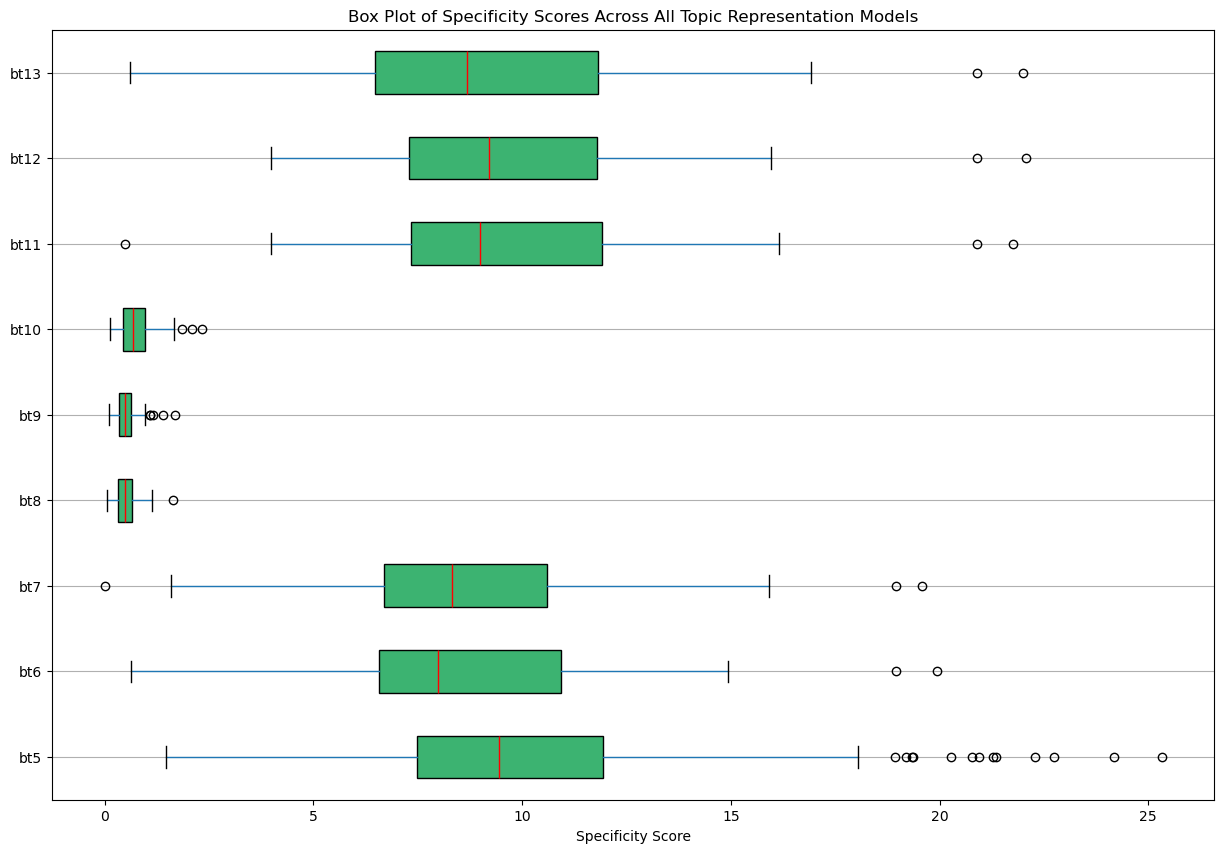

In [30]:
# Dictionary to store specificity scores for each file
all_specificity_scores = {}

for file_path in topics_file_paths:
    topics_df = pd.read_csv(file_path, encoding='utf-8')
    specificity_scores = {}
    
    for index, row in topics_df.iterrows():
        topic = row['Topic']
        words = row['Words'].strip("[]").replace("'", "").split(", ")
        probs = clean_probabilities(row['Probabilities'])
        specificity_scores[topic] = calculate_specificity(words, probs, idf)
    
    all_specificity_scores[file_path] = specificity_scores

# Aggregate and plot the results
average_specificity_scores = {
    file_path: np.mean(list(scores.values()))
    for file_path, scores in all_specificity_scores.items()
}

all_specificity_scores_df = pd.DataFrame.from_dict(all_specificity_scores, orient='index').transpose()


# Create a box plot for all specificity scores
plt.figure(figsize=(15, 10))
all_specificity_scores_df.columns = ['bt5', 'bt6', 'bt7', 'bt8', 'bt9', 'bt10', 'bt11', 'bt12', 'bt13']
all_specificity_scores_df.boxplot(vert=False, patch_artist=True, 
                                  boxprops=dict(facecolor='mediumseagreen'), medianprops=dict(color='red'))

plt.xlabel('Specificity Score')
plt.title('Box Plot of Specificity Scores Across All Topic Representation Models')
plt.grid(axis='x')
plt.yticks(range(1, len(all_specificity_scores_df.columns) + 1), all_specificity_scores_df.columns)
# Save the plot
output_path = 'C:/Users/maria/OneDrive/Documentos/Thesis/Report/bertopic_specificity.png'
plt.savefig(output_path)
plt.show()

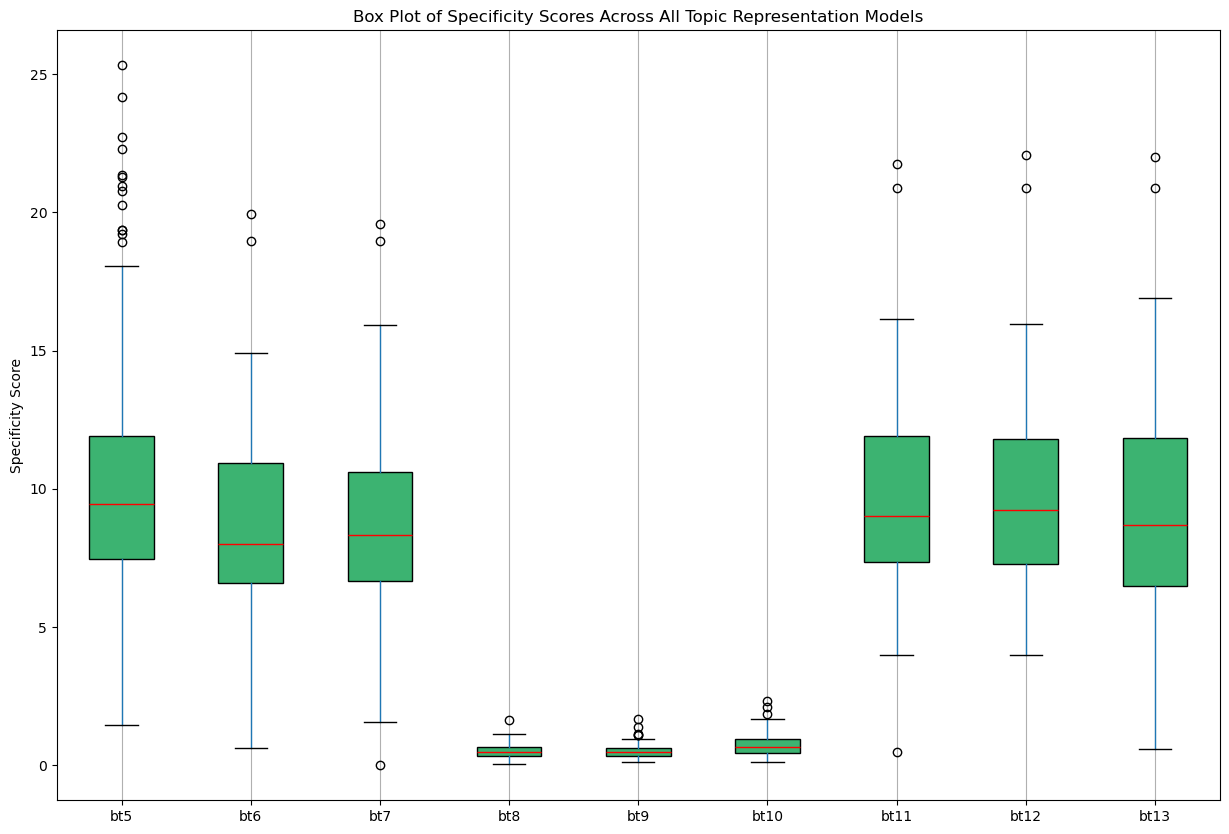

In [33]:
# Create a vertical box plot for all specificity scores
plt.figure(figsize=(15, 10))
all_specificity_scores_df.boxplot(vert=True, patch_artist=True, 
                                  boxprops=dict(facecolor='mediumseagreen'), medianprops=dict(color='red'))

plt.ylabel('Specificity Score')
plt.title('Box Plot of Specificity Scores Across All Topic Representation Models')
plt.grid(axis='y')
plt.xticks(range(1, len(all_specificity_scores_df.columns) + 1), all_specificity_scores_df.columns)
# Save the plot
output_path = 'C:/Users/maria/OneDrive/Documentos/Thesis/Report/bertopic_specificity.png'
plt.savefig(output_path)
plt.show()

In [26]:
all_specificity_scores_df

,bt5,bt6,bt7,bt8,bt9,bt10,bt11,bt12,bt13
Topic -1,5.961150,5.783106,5.410564,0.171951,0.175176,0.167972,6.472411,6.869468,5.781126
Topic 0,11.663765,6.610195,8.481242,0.059533,0.132662,0.127052,7.343966,6.683409,6.824084
Topic 1,6.294905,7.763572,7.832409,0.177125,0.167248,0.356491,8.423236,5.609500,8.411119
Topic 2,4.494120,6.555280,7.480817,0.281331,0.226981,0.232224,4.383680,4.443407,7.191189
Topic 3,14.614062,9.038057,8.020067,0.153913,0.211113,0.283080,8.931414,11.046553,6.609772
...,...,...,...,...,...,...,...,...,...
Topic 530,6.710366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Topic 531,5.553251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Topic 532,19.350539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Topic 533,9.319156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 1200x800 with 0 Axes>

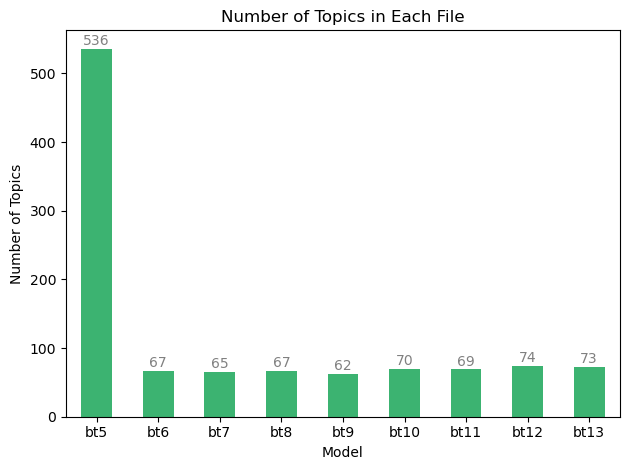

In [32]:
# Dictionary to store the number of topics for each file
number_of_topics = {}

for file_path in topics_file_paths:
    topics_df = pd.read_csv(file_path, encoding='utf-8', sep='\t')
    
    # Store the number of rows (topics) for each file
    number_of_topics[file_path] = len(topics_df)

# Convert the dictionary to a DataFrame for plotting
number_of_topics_df = pd.DataFrame.from_dict(number_of_topics, orient='index', columns=['Number of Topics'])

# Rename the index to match the bt labels
number_of_topics_df.index = ['bt5', 'bt6', 'bt7', 'bt8', 'bt9', 'bt10', 'bt11', 'bt12', 'bt13']

# Plot the number of topics
plt.figure(figsize=(12, 8))
number_of_topics_df.plot(kind='bar', legend=False, color='mediumseagreen')
plt.xlabel('Model')
plt.ylabel('Number of Topics')
plt.title('Number of Topics in Each File')
plt.xticks(rotation=0)

# Annotate the bars with the number of topics
for i, value in enumerate(number_of_topics_df['Number of Topics']):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', color ='grey')

plt.tight_layout()
output_path = 'C:/Users/maria/OneDrive/Documentos/Thesis/Report/bertopic_num_topics.png'
plt.savefig(output_path)
# Show the plot
plt.show()

### Minimality

In [38]:
!python -m spacy download en_core_web_md

     ---------------------------------------- 42.8/42.8 MB 4.1 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


2024-07-18 16:46:21.153585: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.



In [39]:
import pandas as pd
import numpy as np
from sklearn.metrics import jaccard_score
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_md")

In [57]:
# Calculate Jaccard Similarity
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return len(s1.intersection(s2)) / len(s1.union(s2))

# Dictionary to store results
results = []

for file_path in topics_file_paths:
    print(f'Analyzing {file_path}')
    topics_df = pd.read_csv(file_path, encoding='utf-8')
    
    # Clean the Words column
    topics_df['Words'] = topics_df['Words'].apply(lambda x: x.strip("[]").replace("'", "").split(", "))
    
    # Calculate pairwise Jaccard similarities
    jaccard_similarities = []
    for i, words1 in enumerate(topics_df['Words']):
        for j, words2 in enumerate(topics_df['Words']):
            if i < j:
                sim = jaccard_similarity(words1, words2)
                jaccard_similarities.append(sim)
    
    average_jaccard_similarity = np.mean(jaccard_similarities)
    
    results.append({
        'file_path': file_path,
        'average_jaccard_similarity': average_jaccard_similarity
    })

# Convert results to DataFrame and display
jaccard_similarities_df = pd.DataFrame(results)
print(jaccard_similarities_df)

# Save results to CSV
results_file_path = 'C:/Users/maria/OneDrive/Documentos/Thesis/jaccard_similarities.csv'
jaccard_similarities_df.to_csv(results_file_path, index=False)

jaccard_similarities_df

Analyzing C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/Cleaned_Topic_Data_v1_535.csv
Analyzing C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/Cleaned_Topic_Data_v6_4.csv
Analyzing C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/Cleaned_Topic_Data_v7_4.csv
Analyzing C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/Cleaned_Topic_Data_v8.csv
Analyzing C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/Cleaned_Topic_Data_v9.csv
Analyzing C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/Cleaned_Topic_Data_v10.csv
Analyzing C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/Cleaned_Topic_Data_v11.csv
Analyzing C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/Cleaned_Topic_Data_v12.csv
Analyzing C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3

,file_path,average_jaccard_similarity
0,C:/Users/maria/OneDrive/Documentos/Thesis/data...,0.009173
1,C:/Users/maria/OneDrive/Documentos/Thesis/data...,0.025264
2,C:/Users/maria/OneDrive/Documentos/Thesis/data...,0.023107
3,C:/Users/maria/OneDrive/Documentos/Thesis/data...,0.007558
4,C:/Users/maria/OneDrive/Documentos/Thesis/data...,0.009522
5,C:/Users/maria/OneDrive/Documentos/Thesis/data...,0.068764
6,C:/Users/maria/OneDrive/Documentos/Thesis/data...,0.022620
7,C:/Users/maria/OneDrive/Documentos/Thesis/data...,0.024183
8,C:/Users/maria/OneDrive/Documentos/Thesis/data...,0.022548


Semantic similarity

In [54]:
import gensim
from gensim.models import Word2Vec
# Tokenize the documents
tokenized_docs = [doc.split() for doc in docs]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_docs, vector_size=100, window=5, min_count=1, workers=4)


In [45]:
# Calculate Semantic Similarity using Word2Vec
def semantic_similarity(word1, word2, model):
    if word1 in model.wv and word2 in model.wv:
        return 1 - cosine(model.wv[word1], model.wv[word2])
    else:
        return 0  # If the word is not in the vocabulary, treat it as dissimilar

    

In [58]:
# Calculate Semantic Similarity using Word2Vec
def semantic_similarity(word1, word2, model):
    if word1 in model.wv and word2 in model.wv:
        return 1 - cosine(model.wv[word1], model.wv[word2])
    else:
        return 0  # If the word is not in the vocabulary, treat it as dissimilar

# Dictionary to store results
results = []

for file_path in topics_file_paths:
    print(f'Analyzing {file_path}')
    topics_df = pd.read_csv(file_path, encoding='utf-8', sep=',')
    
    # Clean the Words column
    topics_df['Words'] = topics_df['Words'].apply(lambda x: x.strip("[]").replace("'", "").split(", "))
    
    # Calculate pairwise semantic similarities
    semantic_similarities = []
    for i, words1 in enumerate(topics_df['Words']):
        for j, words2 in enumerate(topics_df['Words']):
            if i < j:
                sim = np.mean([semantic_similarity(w1, w2, word2vec_model) for w1 in words1 for w2 in words2])
                semantic_similarities.append(sim)
    
    average_semantic_similarity = np.mean(semantic_similarities)
    
    results.append({
        'file_path': file_path,
        'average_semantic_similarity': average_semantic_similarity
    })

# Convert results to DataFrame and display
semantic_similarities_df = pd.DataFrame(results)
print(semantic_similarities_df)

# Save results to CSV
results_file_path = 'C:/Users/maria/OneDrive/Documentos/Thesis/minimality_results_semantic.csv'
semantic_similarities_df.to_csv(results_file_path, index=False)

semantic_similarities_df

Analyzing C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/Cleaned_Topic_Data_v1_535.csv
Analyzing C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/Cleaned_Topic_Data_v6_4.csv
Analyzing C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/Cleaned_Topic_Data_v7_4.csv
Analyzing C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/Cleaned_Topic_Data_v8.csv
Analyzing C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/Cleaned_Topic_Data_v9.csv
Analyzing C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/Cleaned_Topic_Data_v10.csv
Analyzing C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/Cleaned_Topic_Data_v11.csv
Analyzing C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/BERT_topics/Topics_BERTopic/Cleaned_Topic_Data_v12.csv
Analyzing C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3

,file_path,average_semantic_similarity
0,C:/Users/maria/OneDrive/Documentos/Thesis/data...,0.081039
1,C:/Users/maria/OneDrive/Documentos/Thesis/data...,0.081285
2,C:/Users/maria/OneDrive/Documentos/Thesis/data...,0.080199
3,C:/Users/maria/OneDrive/Documentos/Thesis/data...,0.078284
4,C:/Users/maria/OneDrive/Documentos/Thesis/data...,0.074147
5,C:/Users/maria/OneDrive/Documentos/Thesis/data...,0.053876
6,C:/Users/maria/OneDrive/Documentos/Thesis/data...,0.078848
7,C:/Users/maria/OneDrive/Documentos/Thesis/data...,0.082046
8,C:/Users/maria/OneDrive/Documentos/Thesis/data...,0.075618


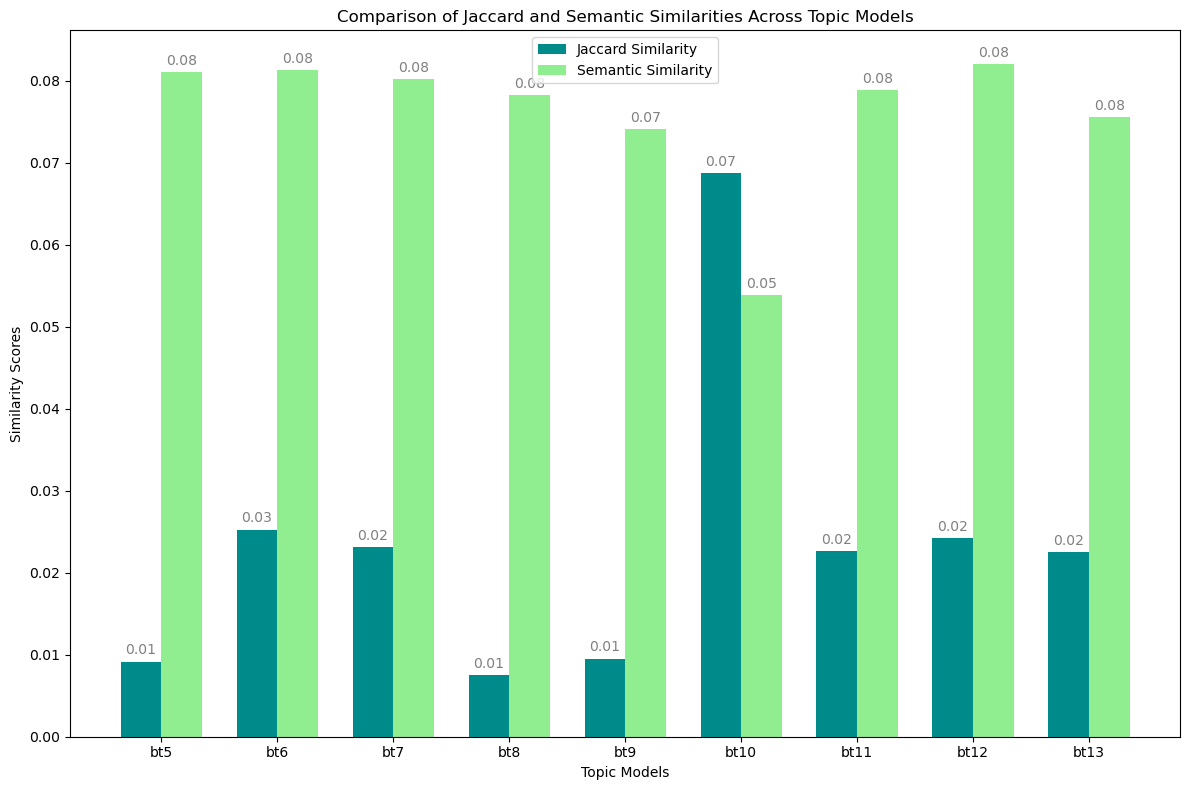

In [66]:
# Labels for the bar chart
labels = ['bt5', 'bt6', 'bt7', 'bt8', 'bt9', 'bt10', 'bt11', 'bt12', 'bt13']

# Extract the similarity scores
jaccard_similarities = jaccard_similarities_df['average_jaccard_similarity'].tolist()
semantic_similarities = semantic_similarities_df['average_semantic_similarity'].tolist()


# Create the bar chart
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, jaccard_similarities, width, label='Jaccard Similarity', color='darkcyan')
rects2 = ax.bar(x + width/2, semantic_similarities, width, label='Semantic Similarity', color='lightgreen')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Topic Models')
ax.set_ylabel('Similarity Scores')
ax.set_title('Comparison of Jaccard and Semantic Similarities Across Topic Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to add labels above bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', color = 'grey')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()

# Save the plot to a file
output_path = 'C:/Users/maria/OneDrive/Documentos/Thesis/Report/bertopic_similarity.png'
plt.savefig(output_path)
plt.show()